In [1]:
from src.manifolds.S1 import *
M = S1()
print(M)

import matplotlib.pyplot as plot
#from src.plotting import *
#%matplotlib notebook

1d circle


In [2]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

# element, tangent vector and covector
x = np.array([0.])
v = np.array([1.])
p = M.flatf(x,v)

print("x = ", x)
print("v = ", v)
print("p = ", p)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


x =  [0.]
v =  [1.]
p =  [1.]


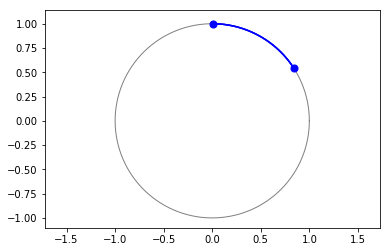

In [3]:
# 2nd order geodesic equation
from src.Riemannian import geodesic
geodesic.initialize(M)

# compute geodesics
xs = M.Exptf(x,v)

# plot
M.plot()
M.plotx(xs,linewidth = 1.5, s=50)
plt.show()

# Extrinsic vs intrinsic means

In [4]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

In [8]:
N = 100
dat = np.zeros((N,1))
dat2 = np.zeros((N,2))
for i in range(N):
    (ts,xs) = M.Brownian_coordsf(x,0.7*dWsf(M.dim.eval()))
    dat[i,:] = xs[-1,0]
    dat2[i,:] = M.Ff(np.array([xs[-1,0]]))

In [9]:
from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

# Logarithm map
from src.Riemannian import Log
Log.initialize(M,M.Exp_Hamiltonian)

from src.statistics.Frechet_mean import *

res = Frechet_mean(M,lambda *args: M.Logf(*args), dat)
Fm = res[0]
print("loss = ", res[1])
print("mean = ", Fm)
iterations = res[2]

loss =  0.3956498458650694
mean =  [0.03558227]


[0.02997829 0.81918345]


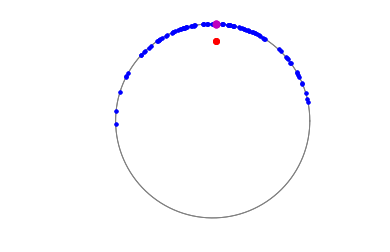

In [12]:
m_ex = np.mean(dat2, axis = 0)
print(m_ex)
M.plot()
for i in range(N):
    M.plotx(dat[i,:], color='b', s=10)
plt.scatter(m_ex[0],m_ex[1], color = 'r')
M.plotx(Fm, color='m',s=50)
plt.axis('off')
#plt.savefig('/home/line/Dropbox/thesis/Thesis/nonlinearty.pdf')
plt.show()

# Distributions (Euclidean vs. Intrinsic)

In [1]:
from src.manifolds.S2 import *
M = S2()
print(M)

from src.plotting import *

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


2d sphere (ellipsoid parameters [1. 1. 1.], spherical_coords: False)


In [2]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

# element, tangent vector and covector
x = np.array([0.,0.])
v = np.array([0.5,0.])
p = M.flatf(x,v)

print("x = ", x)
print("v = ", v)
print("p = ", p)

x =  [0. 0.]
v =  [0.5 0. ]
p =  [2. 0.]


# Geodesics showing curvature

In [3]:
# 2nd order geodesic equation
from src.Riemannian import geodesic
geodesic.initialize(M)

In [11]:
xs2

array([[1.51776868, 0.01      ],
       [1.51767679, 0.02      ],
       [1.51749302, 0.02999892],
       [1.51721738, 0.03999567],
       [1.5168499 , 0.04998917],
       [1.51639064, 0.05997834],
       [1.51583965, 0.06996209],
       [1.51519702, 0.07993936],
       [1.51446285, 0.08990905],
       [1.51363725, 0.0998701 ],
       [1.51272035, 0.10982142],
       [1.51171231, 0.11976195],
       [1.51061328, 0.12969061],
       [1.50942345, 0.13960635],
       [1.50814301, 0.1495081 ],
       [1.50677217, 0.15939479],
       [1.50531117, 0.16926539],
       [1.50376024, 0.17911882],
       [1.50211965, 0.18895406],
       [1.50038967, 0.19877006],
       [1.49857059, 0.20856578],
       [1.49666272, 0.21834019],
       [1.49466639, 0.22809227],
       [1.49258192, 0.23782101],
       [1.49040967, 0.24752538],
       [1.48815001, 0.2572044 ],
       [1.48580332, 0.26685704],
       [1.48336999, 0.27648234],
       [1.48085044, 0.28607929],
       [1.47824509, 0.29564694],
       [1.

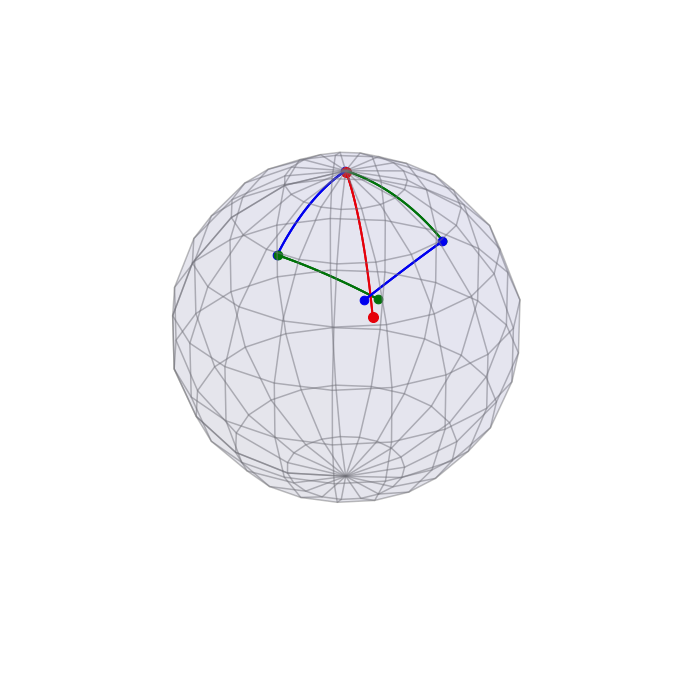

In [30]:
x = np.array([0.,0.])
v1 = np.array([0.25,0.25])
v2 = np.array([-0.25,0.25])

# compute geodesics
xs1 = M.Exptf(x,v1)
xs2 = M.Exptf(xs1[-1,:],v2)
xslc = M.Exptf(x,v1 + v2)
xs3 = M.Exptf(x,v2)
xs4 = M.Exptf(xs3[-1,:],v1)

# plot
%matplotlib inline
newfig()
M.plot(rotate=(30,80), alpha = 0.05)
M.plotx(xs1, linewidth = 2, s=75, color = "b")
M.plotx(xs2, linewidth = 2, s=75,color = "g")
M.plotx(xslc,linewidth = 2, s=100, color = "r")
M.plotx(xs3, linewidth = 2, s=50, color = "g")
M.plotx(xs4,linewidth = 2, s=75, color = "b")
plt.axis('off')
plt.savefig("path_dep.pdf")
plt.show()

<IPython.core.display.Javascript object>


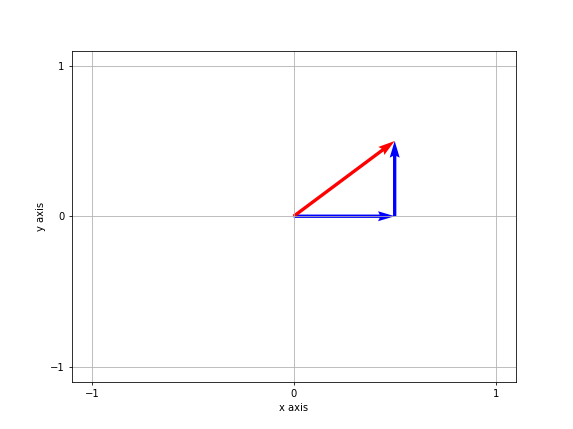

line : 
 [-1  0  1]


In [39]:
import numpy as np
import matplotlib.pyplot as plt

lineSizePositive = 1
lineSizeNegative = -1
numberOfSampleOfLine = lineSizePositive * 2 + 1

vectors  = {"StartingPointOfX" : 0,"StartingPointOfY" : 0,
            "SizeOfXvector" : 0.5,"StartingPointOfYvector" : 0,
            "VectorColor" : "b"}
vectors2 = {"StartingPointOfX" : 0.5,"StartingPointOfY" : 0,
            "SizeOfXvector" : 0.,"StartingPointOfYvector" : 0.5,
            "VectorColor" : "b"}

vectors3 = {"StartingPointOfX" : 0,"StartingPointOfY" : 0,
            "SizeOfXvector" : 0.5,"StartingPointOfYvector" : 0.5,
            "VectorColor" : "r"}

vectorList = [vectors, vectors2, vectors3]

        
def PlotVector(legend=True) :
    # Create a figure of size 8x6 inches, 80 dots per inch
    fig = plt.figure(figsize=(8, 6), dpi=80)
    
    # for the origin
    #ax = fig.gca()
    #ax.scatter([0],[0],color="k",s=100)
    
    # line size of each axes 
    line = np.linspace(lineSizeNegative, lineSizePositive, numberOfSampleOfLine, endpoint=True, dtype="int")

    # print varialble line
    print ("line : \n {0}".format(line))

    # Set x limits, * 1.1 just express more space for drawing
    xlim = plt.xlim(line.min() * 1.1, line.max() * 1.1)

    # print varialble line
    #print ("xlim : \n {0}".format(xlim))

    # Set x ticks
    xticks = plt.xticks(line)

    # print varialble line
    #print ("xticks : \n {0}".format(xticks))

    # Set x limits, * 1.1 just express more space for drawing
    ylim = plt.ylim(line.min() * 1.1, line.max() * 1.1)

    # print varialble line
    #rint ("ylim : \n {0}".format(ylim))

    # Set x ticks
    yticks = plt.yticks(line)

    # print varialble line
    #rint ("yticks : \n {0}".format(yticks))

    # set label name of x axis
    plt.xlabel("x axis")

    # set label name of y axis
    plt.ylabel("y axis")

    # set grid of coordinate to True
    plt.grid(linestyle = "-")

    # choose one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'} as vector color
    # 'b' : blue, 'g' : green, 'r' : red, 'c' : cyan,
    # 'm' : meganta, 'y':yellow, 'k' : black, 'w' : whilte from https://matplotlib.org/api/colors_api.html
    
    for vec in vectorList :
        vecs = plt.quiver(vec["StartingPointOfX"], vec["StartingPointOfY"], vec["SizeOfXvector"], vec["StartingPointOfYvector"]
                  , angles="xy", scale_units="xy",scale=1, color=vec["VectorColor"]) 
        #if (legend) :
            #plt.legend(["The origin",r'$\vec a$',"test 2"])

    plt.show()

    
    
PlotVector()   


## Mean example

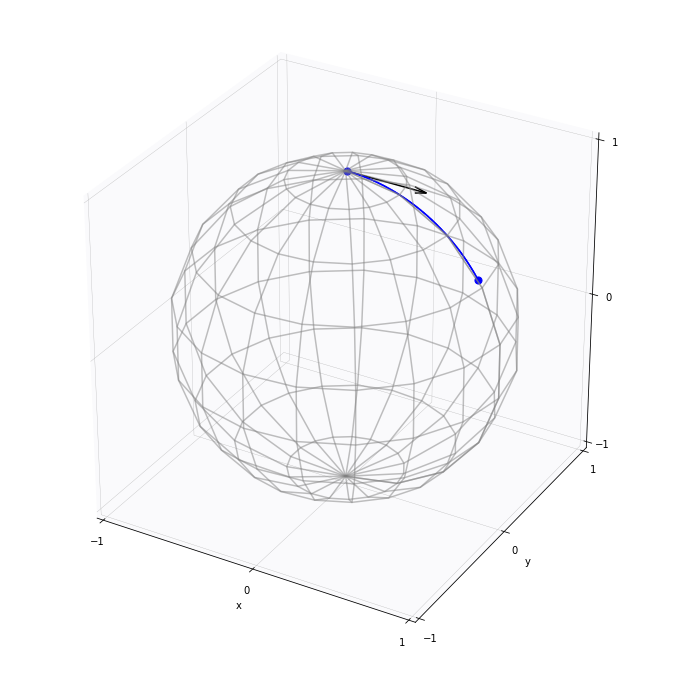

In [4]:
# 2nd order geodesic equation
from src.Riemannian import geodesic
geodesic.initialize(M)

# compute geodesics
xs = M.Exptf(x,v)

# plot
newfig()
M.plot()
M.plotx(xs,v,linewidth = 1.5, s=50)
plt.show()

In [82]:
v = np.array([np.pi/4,0.])
b = np.linspace(0,2*np.pi, 100)
yd = np.zeros((100,2))
eq = np.zeros((100,2))
for i in range(100):
    vi = np.array([np.cos(b[i])*v[0]-np.sin(b[i])*v[1],
                   np.sin(b[i])*v[0]+np.cos(b[i])*v[1]])
    yd[i,:] = M.Expf(x,vi + np.random.normal(0,0.02, M.dim.eval()))
    eq[i,:] = M.Expf(x,vi)

In [72]:
from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

# Logarithm map
from src.Riemannian import Log
Log.initialize(M,M.Exp_Hamiltonian)

from src.statistics.Frechet_mean import *

res = Frechet_mean(M,lambda *args: M.Logf(*args), yd)
Fm = res[0]
print("loss = ", res[1])
print("mean = ", Fm)
iterations = res[2]

loss =  3.9305363188296645
mean =  [-0.09817362  0.8874391 ]


<IPython.core.display.Javascript object>


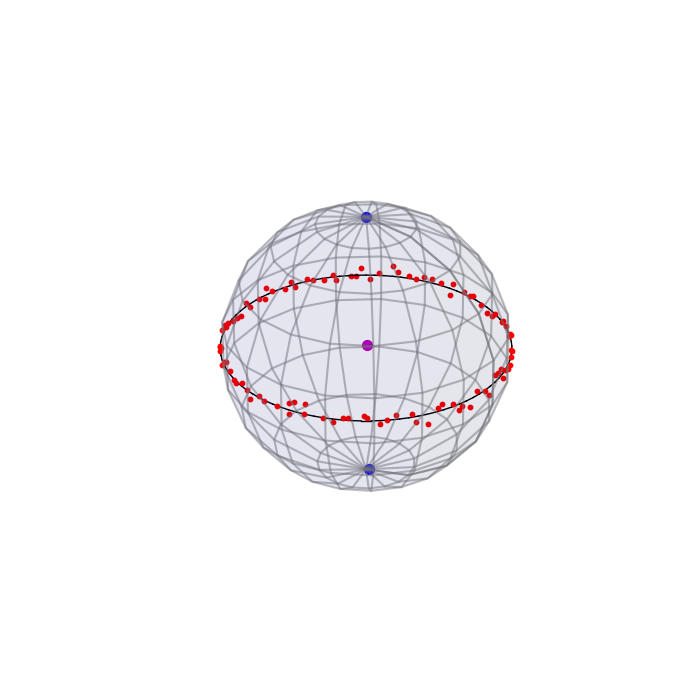

In [84]:
%matplotlib notebook
plt.figure(figsize=(7,7))
M.plot(alpha=0.05)
dat = np.zeros((100,3))
for i in range(100):
    M.plotx(yd[i,:],s=10, color='red')
    dat[i,:] = M.Ff(yd[i,:])
Em = np.mean(dat,axis=0)
M.plotx(Em, color = 'm', s=50)
Fm1 = np.array([0,0])
M.plotx(Fm1, color = 'b', s=50)
Fm1 = np.array([20*np.pi,20*np.pi])
M.plotx(Fm1, color = 'b', s=50)
M.plotx(eq, color='black', s=0.001)
plt.axis('off')
#plt.savefig('/home/line/Dropbox/thesis/Thesis/nonlinearty.pdf')
plt.show()

## Distribution example

In [5]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

In [6]:
N = 100
dat = np.zeros((N,2))
for i in range(N):
    (ts,xs) = M.Brownian_coordsf(x,0.3*dWsf(M.dim.eval()))
    dat[i,:] = xs[-1,:]

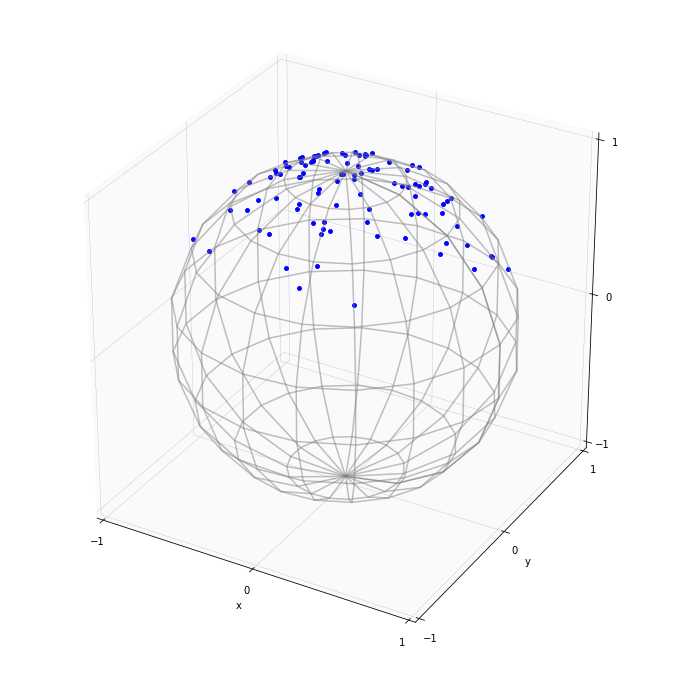

In [7]:
M.plot()
for i in range(N):
    M.plotx(dat[i,:])
plt.show()

In [7]:
#def plot_density_estimate(M, obss, alpha=.2, limits=None, border=1.5, bandwidth=0.08, pts=100, cmap = cm.jet):
bandwidth = 0.08
if obss.shape[1] > M.dim.eval():
    obss_q = np.array([M.get_coordsf(obs) for obs in obss])
else:
    obss_q = obss
kde = KernelDensity(bandwidth=bandwidth, metric='pyfunc', metric_params={"func":lambda q1,q2: np.linalg.norm((M.Ff(q1)-M.Ff(q2)))},
                    kernel='gaussian')
kde.fit(obss_q)

NameError: name 'obss' is not defined

In [ ]:
# grids
border = 2.
limits = None
pts = 100
obss_q_max = np.max(obss_q,axis=0)
obss_q_min = np.min(obss_q,axis=0)
minx = limits[0] if limits is not None else obss_q_min[0]-border
maxx = limits[1] if limits is not None else obss_q_max[0]+border
miny = limits[2] if limits is not None else obss_q_min[1]-border
maxy = limits[3] if limits is not None else obss_q_max[1]+border
X, Y = np.meshgrid(np.linspace(minx,maxx,pts),np.linspace(miny,maxy,pts))
xy = np.vstack([X.ravel(), Y.ravel()]).T
xs = np.apply_along_axis(M.Ff,1,xy)
X = xs[:,0].reshape(X.shape)
Y = xs[:,1].reshape(X.shape)
Z = xs[:,2].reshape(X.shape)

In [ ]:
fs = np.exp(kde.score_samples(xy))#/np.apply_along_axis(muM_Qf,1,xy)
norm = mpl.colors.Normalize(vmin=0.,vmax=np.max(fs))
colors = cmap(norm(fs)).reshape(X.shape+(4,))

In [ ]:
# plot
ax = plt.gca()
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap, facecolors = colors, 
                       linewidth=0., antialiased=True, alpha=alpha, edgecolor=(0,0,0,0), shade=False)
m = cm.ScalarMappable(cmap=surf.cmap,norm=norm)
m.set_array(colors)
plt.colorbar(m, shrink=0.7)

<IPython.core.display.Javascript object>


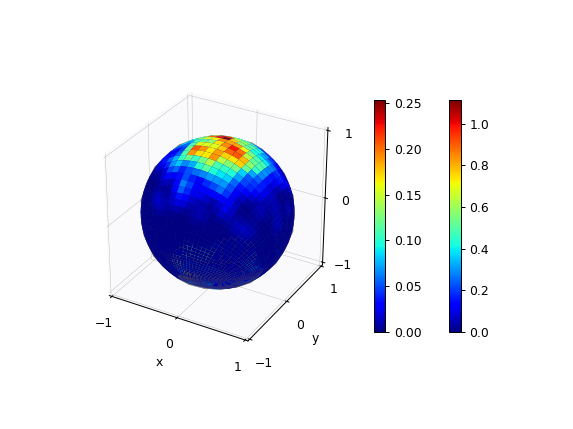

In [6]:
%matplotlib notebook
M.plot()
plot_density_estimate(M,dat,alpha=1.,border=2.)
plt.show()

(3, 1000)


<IPython.core.display.Javascript object>


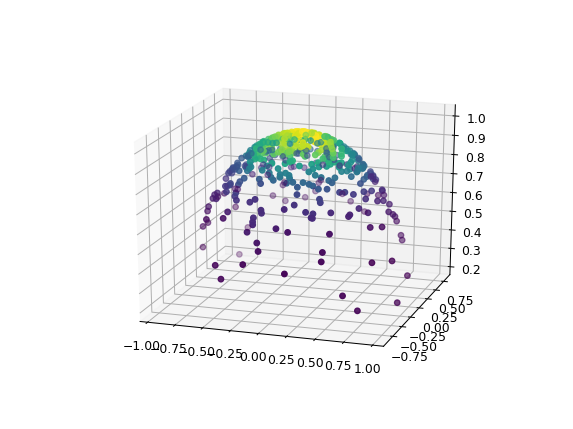

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T
print(values.shape)

D3 = np.zeros((dat.shape[0],3))
for i in range(dat.shape[0]):
    D3[i,:] = M.Ff(dat[i,:])


kde = stats.gaussian_kde(D3.T)
density = kde(D3.T)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = D3.T
ax.scatter(x, y, z, c=density)
plt.show()

# Euclidean Manifold

In [2]:
from src.manifolds.euclidean import *
M2 = Euclidean()
print(M2)

from src.plotting import *

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Euclidean manifold of dimension 3


In [3]:
m = np.array([0.0,0.0,1.0])
sigma = 0.4**2*np.identity(3)
dat_ex = np.random.multivariate_normal(m, sigma, (100))

In [4]:
dat_ex.shape

(100, 3)

In [9]:
from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize

def plot_density_estimate2(obss, alpha=.2, limits=None, border=1.5, bandwidth=0.08, pts=100, cmap = cm.jet):
    if obss.shape[1] > M2.dim.eval():
        obss_q = np.array([M2.get_coordsf(obs) for obs in obss])
    else:
        obss_q = obss
    kde = KernelDensity(bandwidth=bandwidth, metric='pyfunc', metric_params={"func":lambda q1,q2: np.linalg.norm((q1-q2))},
                    kernel='gaussian')
    kde.fit(obss_q)

    # grids
    obss_q_max = np.max(obss_q,axis=0)
    obss_q_min = np.min(obss_q,axis=0)
    minx = limits[0] if limits is not None else obss_q_min[0]-border
    maxx = limits[1] if limits is not None else obss_q_max[0]+border
    miny = limits[2] if limits is not None else obss_q_min[1]-border
    maxy = limits[3] if limits is not None else obss_q_max[1]+border
    minz = limits[4] if limits is not None else obss_q_min[2]-border
    maxz = limits[5] if limits is not None else obss_q_max[2]+border
    X, Y, Z = np.meshgrid(np.linspace(minx,maxx,pts),np.linspace(miny,maxy,pts),np.linspace(minz,maxz,pts))
    xy = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T
    xs = obss_q
    X = xs[:,0]#.reshape(X.shape)
    Y = xs[:,1]#.reshape(X.shape)
    Z = xs[:,2]#.reshape(X.shape)
    print(Z.shape)

    # plot
    ax = plt.gca()
    fs = np.exp(kde.score_samples(xy))#/np.apply_along_axis(muM_Qf,1,xy)
    norm = mpl.colors.Normalize(vmin=0.,vmax=np.max(fs))
    colors = cmap(norm(fs)).reshape(X.shape+(4,))
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap, facecolors = colors,
                           linewidth=0., antialiased=True, alpha=alpha, edgecolor=(0,0,0,0), shade=False)
    m = cm.ScalarMappable(cmap=surf.cmap,norm=norm)
    m.set_array(colors)
    plt.colorbar(m, shrink=0.7)


In [10]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
#M.plot()
plot_density_estimate2(dat_ex,alpha=1.,border=2.)
#ax.scatter3D(dat_ex[:,0],dat_ex[:,1],dat_ex[:,2])
#ax.scatter3D(m[0],m[1],m[2], color = 'r')
plt.show()

(100,)


ValueError: cannot reshape array of size 4000000 into shape (100,4)

In [77]:
from scipy import stats
from mayavi import mlab

mu, sigma = 0, 0.1 
x = 10*np.random.normal(mu, sigma, 5000)
y = 10*np.random.normal(mu, sigma, 5000)    
z = 10*np.random.normal(mu, sigma, 5000)

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 
density = kde(coords).reshape(xi.shape)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
min = density.min()
max=density.max()
mlab.pipeline.volume(grid, vmin=min, vmax=min + .5*(max-min))

mlab.axes()
mlab.show()

RuntimeError: No traitsui.toolkits plugin found for toolkit null

# Front page Picture

In [1]:
# SO(3)
from src.groups.SON import *
G = SON(3)
print(G)

# SO(3) acts on S^2
from src.manifolds.S2 import *
M = S2()
print(M)

from src.plotting import *

/home/line/Dropbox/theanogeometry/src/groups/group.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  xij.eval().reshape(self.N.eval()*self.N.eval())
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


SO(3) (dimension 3)
2d sphere (ellipsoid parameters [1. 1. 1.], spherical_coords: False)


In [2]:
# setup for testing different versions of stochastic dynamics
q = np.array([1e-6,0,0])
g = G.psif(q)
v = np.array([0,1,1])

from src.group import invariant_metric
invariant_metric.initialize(G)
p = G.sharppsif(q,v)
mu = G.sharpVf(v)
print(p)
print(mu)

from src.group import energy
energy.initialize(G)

[0. 1. 1.]
[0. 1. 1.]


In [9]:
import matplotlib.pyplot as plt
def plot2(g,color_intensity=1.,color=None,linewidth=3.,alpha=1.,prevg=None):
        if len(g.shape)>2:
            for i in range(g.shape[0]):
                plot2(g[i],
                      linewidth=linewidth if i==0 or i==g.shape[0]-1 else .3,
                      color_intensity=color_intensity if i==0 or i==g.shape[0]-1 else .7,
                      alpha=alpha,
                      prevg=g[i-1] if i>0 else None)
            return 

        # Grid Settings:
        import matplotlib.ticker as ticker 
        ax = plt.gca(projection='3d')
        x = np.arange(-10,10,1)
        #ax.w_xaxis.set_major_locator(ticker.FixedLocator(x))
        #ax.w_yaxis.set_major_locator(ticker.FixedLocator(x))
        #ax.w_zaxis.set_major_locator(ticker.FixedLocator(x))
        #ax.w_xaxis.set_pane_color((0.98, 0.98, 0.99, 1.0))
        #ax.w_yaxis.set_pane_color((0.98, 0.98, 0.99, 1.0))
        #ax.w_zaxis.set_pane_color((0.98, 0.98, 0.99, 1.0))
        #ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
        #ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
        #ax.zaxis._axinfo["grid"]['linewidth'] = 0.3
        #ax.set_xlim(-1.,1.)
        #ax.set_ylim(-1.,1.)
        #ax.set_zlim(-1.,1.)
        ax.set_aspect("equal")
        ax.set_axis_off()
        
   
        s0 = np.eye(3) # shape
        s = np.dot(g,s0) # rotated shape
        if prevg is not None:
            prevs = np.dot(prevg,s0)

        colors = color_intensity*np.array([[1,0,0],[0,1,0],[0,0,1]])
        for i in range(s.shape[1]):
            plt.quiver(0,0,0,s[0,i],s[1,i],s[2,i],pivot='tail',linewidth=linewidth,color=colors[i] if color is None else color,arrow_length_ratio=.15,length=1,alpha=alpha)
            if prevg is not None:
                ss = np.stack((prevs,s))
                ss = ss/np.linalg.norm(ss,axis=1)[:,np.newaxis,:]
                plt.plot(ss[:,0,i],ss[:,1,i],ss[:,2,i],linewidth=1,color=colors[i])

In [16]:
plt.figure(figsize = [20,20])
plot2(gsv,linewidth=0.1,alpha=0.1)
#plt.show()
plt.savefig('/home/line/Dropbox/thesis/Thesis/pictures/stocso3.pdf')

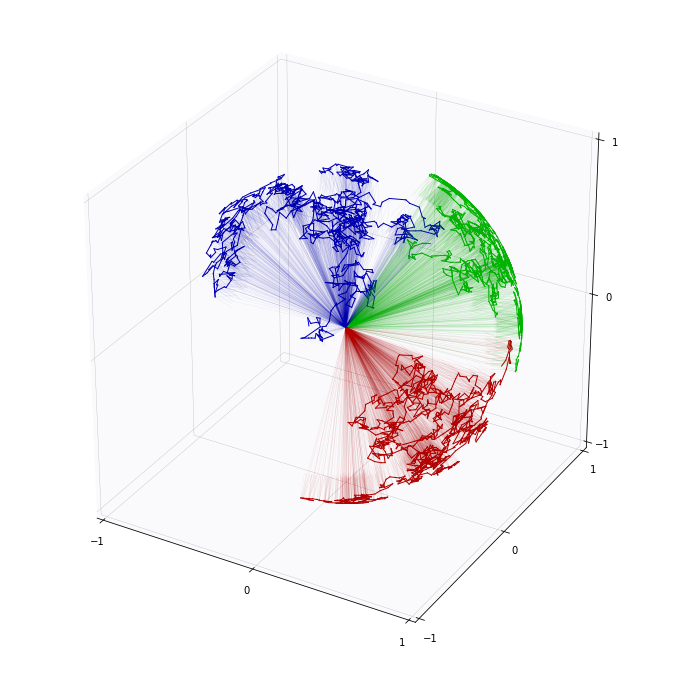

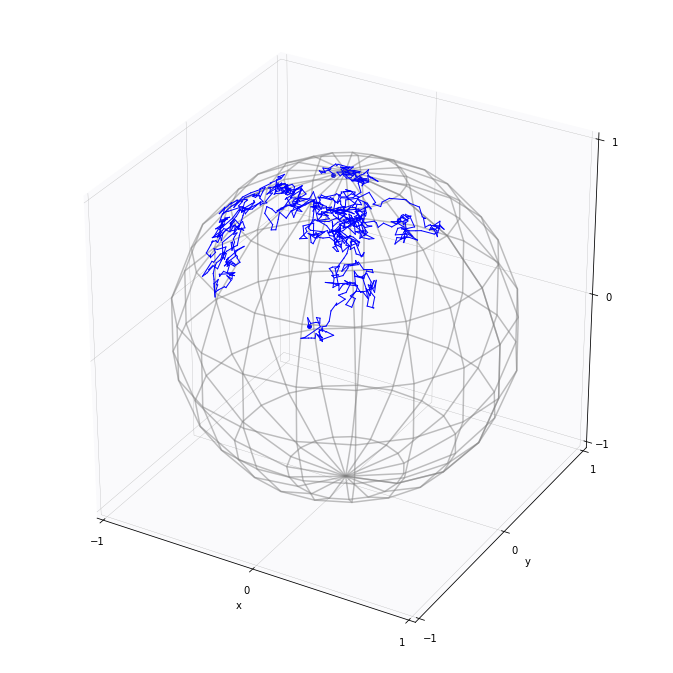

In [3]:
# Brownian motion
from src.stochastics import Brownian_inv
Brownian_inv.initialize(G)

n_steps.set_value(1000)

# srng.seed(422)
srng.seed(407)
(ts,gsv) = G.Brownian_invf(g,dWsf(G.dim.eval()))
newfig()
G.plotg(gsv,linewidth=0.1,alpha=0.1)
plt.show()
#plt.savefig('stocso3.pdf')

# on S2
newfig()
M.plot()
x = np.array([0,0,1])
M.plotx(M.actsf(gsv.transpose((1,2,0)),x).T)
plt.show()
#plt.savefig('stocso32.pdf')